Extra Credit CS 335

Marie Nguyen 

Due: May 6th, 2024

<center>

#### Demo Code: Customer Satisfaction in Airlines 

<center>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions #pip install mlxtend  

##### In this extra credit work, 2 demo codes for Model Evaluation and Generalization will be implemented. 


#### Dataset:

In this demo code, an airline quality ratings dataset from Kaggle is utilized. It contains airline passengers satisfaction, demographics information about each passenger, their flight and type of travel, and ratings on various factors such as cleanliness, comfort, service and overall experience.


https://www.kaggle.com/datasets/mikhail1681/airline-quality-ratings?rvi=1


In [28]:
# Loading the data
mydf = pd.read_csv('AirlineRatings.csv')
mydf = mydf.drop(mydf.columns[0], axis=1) # Remove a duplicated column

print("Inital shape of the dataset is:", mydf.shape)
mydf 

Inital shape of the dataset is: (129880, 23)


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


#### Data Processing:

In [29]:
# Transforming categorical variables into discrete variable:

mydf['Gender'] = mydf['Gender'].map({'Female': 1, 'Male': 0})
mydf['Class'] = mydf['Class'].map({'Economy': 1, 'Economy Plus': 2, 'Business': 3})
mydf['Satisfaction'] = mydf['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

mydf

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,0,48,First-time,Business,3,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,1,35,Returning,Business,3,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,0,41,Returning,Business,3,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,0,50,Returning,Business,3,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,1,49,Returning,Business,3,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,28,Returning,Personal,2,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,0,41,Returning,Personal,2,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,0,42,Returning,Personal,2,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,0
129878,0,50,Returning,Personal,2,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,1


##### For futher analysis, catergorical variables namely Gender, Class, and Satisfaction are transformed into discrete variables. 

For example: In Satisfaction variable, 0 represents for Neutral or Dissatisfied and 1 represents for Satisfied. 

In Gender variable, 0 represents Male, and 1 represents Female. 

In Class variable, 1 represents Economy, 2 represents Economy Plus, 3 represents Business. 

The number of observations and variables remain the same as 129880 and 23, respectively.

In [30]:
# Check for null values and sum them up by column
null_values = mydf.isnull().sum()
print(null_values)

# Drop null values:
mydf.dropna(inplace=True)

mydf.shape

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

(129487, 23)

Passenger satisfaction is measured by 129487 observations airline passengers after dropping null values in Arival Delay variable. The data is including additional information about each passenger, their flight and type of travel, as well as ratings on various factors such as cleanliness, comfort, service and overall experience.

##### Columns Information

ID: Passenger ID

Gender: Passenger gender

Age: Passenger age

Customer Type: The customer type

Type of Travel: Purpose of the flight of the passengers

Class: Travel class in the plane of the passengers

Flight Distance: Flight distance

Departure Delay: Minutes delayed when departure

Arrival Delay: Minutes delayed when Arrival

Departure & Arrival Time Сonvenience: Convenience of departure and arrival times for passengers

Ease of Online Booking: Easy to book

Check-in Service: Ease of registration

Online Boarding: Convenience of online registration

Gate Location: Gate Location Estimation

On-board Service: Service on board

Seat Comfort: Comfortable seating

Leg Room Service: Leg room service level

Cleanliness: Cleanliness level

Food and Drink: Quality of food and drinks

In-flight Service: Level of service on board

In-flight Wifi Service: Wifi quality level on board

In-flight Entertainment: Rating of in-flight entertainment

Baggage Handling: Opinion on baggage handling

Satisfaction: Airline satisfaction level

Due to the scope of predicting passengers satisfaction for the airline, 'Gender', 'Age', 'Class','Departure Delay', 'Arrival Delay', 'Ease of Online Booking', 
          'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 
          'Cleanliness', 'Food and Drink', 'In-flight Service', 'Baggage Handling' are utilized as independent variables. 

In other words, there are 15 predictors further used in build machine learning models as well as evaluate their performance. 


### Data Visualization: Target Variable

Satisfaction
0    73225
1    56262
Name: count, dtype: int64


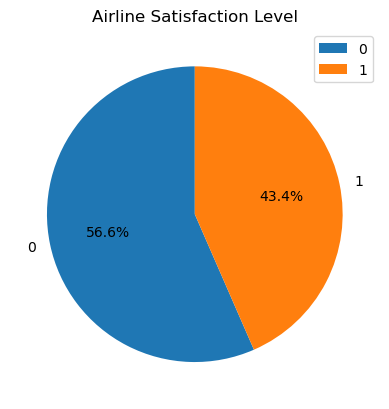

In [31]:
# Create a pie chart
level_count = mydf['Satisfaction'].value_counts()
print(level_count)

labels = level_count.index.tolist()
sizes = level_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Airline Satisfaction Level')
plt.legend(labels, loc='best')

plt.show()

As can be seen from the above pie chart that an imbalance class issue might not occur. The number of Neutral or Dissatisfied passengers (0) and Satisfied passengers (1) are roughly distributed equally. 

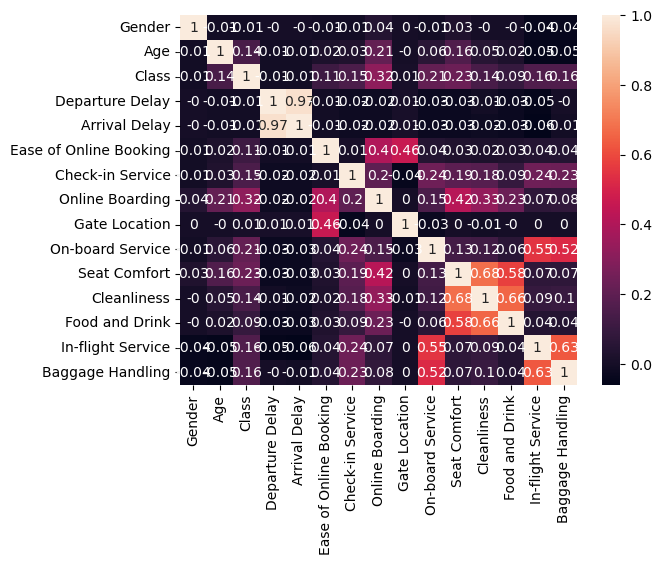

In [32]:
df_corr = mydf[['Gender', 'Age', 'Class','Departure Delay', 'Arrival Delay', 'Ease of Online Booking', 
          'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 
          'Cleanliness', 'Food and Drink', 'In-flight Service', 'Baggage Handling']].corr().round(2)

#Correlation matrix heatmap using seaborn
sns.heatmap(df_corr, annot=True)
plt.show()

There is no highly correlation between 2 indepdent variables, indicating that there is no multicollinearity occuring in the data. 

#### Machine Learning Models: 

Logistic Regression, kNN, Decision Tree, and Neural Network are built with an application of GridSearch to find a best set of hyperparameters for better generalization. 

In [35]:
# Define the independent variables (features) and the dependent variable (target)
X = mydf[['Gender', 'Age', 'Class','Departure Delay', 'Arrival Delay', 'Ease of Online Booking', 
          'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 
          'Cleanliness', 'Food and Drink', 'In-flight Service', 'Baggage Handling']]
y = mydf['Satisfaction']


# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 33)

#### Logistic Regression:

In [41]:
model = LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial', random_state=33)

# Create a pipeline for scaling and logistic regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", model)
])

param_grid = {
    "logistic__C": [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.008, 0.010, 0.01, 0.05, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_weighted', refit=True)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Make prediction based on the model with optimal value of hyperparameter. 
y_pred = grid_search.predict(X_test)

# Print out Confusion Matrix and Classification Report based on model performance on test set:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'logistic__C': 0.0005}
Best cross-validation score: 0.8202559394660328
[[19059  2875]
 [ 4033 12880]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     21934
           1       0.82      0.76      0.79     16913

    accuracy                           0.82     38847
   macro avg       0.82      0.82      0.82     38847
weighted avg       0.82      0.82      0.82     38847



#### k-Nearest Neighbor Model:

In [45]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5, 9, 10, 11, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=1)

grid_search_knn.fit(X_train, y_train)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score:", grid_search_knn.best_score_)

y_pred = grid_search_knn.predict(X_test)

# Print out Confusion Matrix and Classification Report based on model performance on test set:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.8630736981465137
[[19773  2161]
 [ 3199 13714]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     21934
           1       0.86      0.81      0.84     16913

    accuracy                           0.86     38847
   macro avg       0.86      0.86      0.86     38847
weighted avg       0.86      0.86      0.86     38847





#### Decision Tree Model

In [46]:
dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}

grid_search_dt = GridSearchCV(dtree, param_grid, cv=10, scoring='f1_weighted', verbose=1, refit=True)

grid_search_dt.fit(X_train, y_train)

print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)

y_pred = grid_search_dt.predict(X_test)

# Print out Confusion Matrix and Classification Report based on model performance on test set:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 15}
Best cross-validation score: 0.8975508768952294
[[20349  1585]
 [ 2395 14518]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     21934
           1       0.90      0.86      0.88     16913

    accuracy                           0.90     38847
   macro avg       0.90      0.89      0.90     38847
weighted avg       0.90      0.90      0.90     38847



According to results above, decision tree yields the highest cross-validation score. The precision and overal model accuracy of predicting the satisfaction of customers is also higher with a value of 0.9. Hence, decision tree outperforms compared to logistic regression and kNN. In this case, when GridSearch with 10 cross-validation is applied, the mode generalizes well. 